### Notas de aula de Computação Quântica <br> Autor: Jonas Maziero

In [1]:
%run init.ipynb

# Atualização
A biblioteca ignis foi aposentada (deprecated). Agora tem-se que usar outra biblioteca para fazer tomografia de estados. Segue um exemplo.

In [14]:
!pip install -U qiskit==0.39.4

  Using cached qiskit-0.39.4.tar.gz (13 kB)
     |████████████████████████████████| 4.8 MB 241 kB/s eta 0:00:01
     |████████████████████████████████| 12.8 MB 145 kB/s eta 0:00:01     |████▋                           | 1.8 MB 30.4 MB/s eta 0:00:01
  Created wheel for qiskit: filename=qiskit-0.39.4-py3-none-any.whl size=12273 sha256=8ce57dbe99d3e2cbe102d6113336324fe7631beb5245f3ee20e6987c3e482c65
  Stored in directory: /home/jonasmaziero/.cache/pip/wheels/40/2c/d7/aa04e366b971ddf815dba1250b024c248e7851ee208dd0e990
Successfully built qiskit
  Attempting uninstall: qiskit-terra
    Found existing installation: qiskit-terra 0.22.2
    Uninstalling qiskit-terra-0.22.2:
      Successfully uninstalled qiskit-terra-0.22.2
  Attempting uninstall: qiskit-aer
    Found existing installation: qiskit-aer 0.11.1
    Uninstalling qiskit-aer-0.11.1:
      Successfully uninstalled qiskit-aer-0.11.1
  Attempting uninstall: qiskit
    Found existing installation: qiskit 0.39.2
    Uninstalling qiskit-0.

In [1]:
import qiskit
from qiskit import *
nshots = 8192
IBMQ.load_account()
provider = qiskit.IBMQ.get_provider(hub='ibm-q', group='open', project='main')
device = provider.get_backend('ibmq_quito')
simulator = Aer.get_backend('qasm_simulator')
from qiskit.tools.monitor import job_monitor

In [2]:
qr = QuantumRegister(1)
qc = QuantumCircuit(qr)
qc.h(qr[0])
qc.draw()

┌───┐
q0: ┤ H ├
    └───┘

In [ ]:
from qiskit_experiments.library import StateTomography # essa é com o novo qiskit 039

qcst = StateTomography(qc, measurement_qubits = [0])
data = qcst.run(simulator)
rho = data.block_for_results().analysis_results(0).value

from qiskit.visualization import array_to_latex
array_to_latex(rho)

In [10]:
d = rho.dims()[0]; print(rho.dims(), d)

(2,) 2


In [11]:
rhoM = rho.to_operator().data; print(rhoM)

[[0.49414238+0.j         0.49985034+0.01073897j]
 [0.49985034-0.01073897j 0.50585762+0.j        ]]


In [12]:
rhoM[0,0], abs(rhoM[0,0])

((0.49414237882398676+0j), 0.49414237882398676)

In [13]:
job_exp = qcst.run(device, shots=nshots)#.block_for_results()
print(job_exp.experiment_id)
job_exp.job_status()
sudo apt install jupyter-core

478801a0-eccb-40cf-a3f8-434d37226c48


<JobStatus.VALIDATING: 'job is being validated'>

In [14]:
rho = job_exp.block_for_results().analysis_results(0).value
rhoM = rho.to_operator().data; print(rhoM)

[[0.5411377 +0.j        0.49365234+0.0045166j]
 [0.49365234-0.0045166j 0.4588623 +0.j       ]]


In [72]:
for j in range(0,10):
    print("\r %d"%j,end=" ")

 9 

In [ ]:
data = device.retrieve_job('03834ee2-0c74-45ff-b744-2cfa3d74f860')
rho = data.block_for_results().analysis_results(0).value
rhoM = rho.to_operator().data; print(rhoM)

# Tomografia de estados quânticos

Para mais detalhes, veja https://qiskit.org/documentation/tutorials/noise/8_tomography.html.

Usaremos funções prontas do qiskit para realizar tomografia de estados quânticos (TEQ). No entanto, lembre de como essas tomografias são feitas na prática. Vale observar que essas funções implementam métodos que garantem a positividade da matriz densidade obtida.

In [ ]:
!pip install -U qiskit==0.36.2

In [1]:
# como sempre, importa tudo do qiskit
from qiskit import *
import qiskit

In [2]:
qiskit.__qiskit_version__

{'qiskit-terra': '0.22.3', 'qiskit-aer': '0.11.2', 'qiskit-ignis': '0.7.1', 'qiskit-ibmq-provider': '0.19.2', 'qiskit': '0.39.4', 'qiskit-nature': '0.4.1', 'qiskit-finance': '0.3.3', 'qiskit-optimization': '0.4.0', 'qiskit-machine-learning': '0.4.0'}

In [3]:
# importa também funcoes para determinar os circuitos a serem tomografados e pra ajustar os dados
from qiskit.ignis.verification.tomography import state_tomography_circuits, StateTomographyFitter

### Cria o circuito

In [4]:
# cria os circuitos, sem medidas
qr = QuantumRegister(1); qc = qiskit.QuantumCircuit(qr); 

In [5]:
# cria o circuito
qc.h(qr[0]);

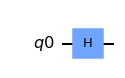

In [6]:
# visualiza o circuito
qc.draw(output='mpl')

### Determina de qual circuito quântico fazer TEQ

In [7]:
# Determina de qual circuito e de qual qubit fazer TEQ
qstc = state_tomography_circuits(qc, qr[0])

In [8]:
# No. de medidas pra estimar cada dist. de probabilidade
nshots = 8192

### Testando no simulador

In [9]:
# testa/executa no simulador
job = qiskit.execute(qstc, Aer.get_backend('qasm_simulator'), shots=nshots)

In [10]:
# 'ajusta' os resultados conforme o esperado do circuit qst
qstf = StateTomographyFitter(job.result(), qstc)

In [11]:
# extrai o operador densidade tomografado
rho = qstf.fit(method='lstsq')

In [12]:
# note que o que retorna é um array do numpy
rho # funcionou mudando a versao do qiskit com o novo ambiente conda

array([[0.50207493+0.j        , 0.49993656-0.00768945j],
       [0.49993656+0.00768945j, 0.49792507+0.j        ]])

In [18]:
import numpy as np
from matplotlib import pyplot as plt

In [22]:
# grafica a parte real de um estado de um qubit
def plot_rho1qb(rho):
    from mpl_toolkits.mplot3d import Axes3D
    from matplotlib import cm
    result = [rho[0,0], rho[0,1], rho[1,0], rho[1,1]]
    result = np.array(result, dtype=float)
    fig = plt.figure(figsize=(4, 4), dpi=100)
    ax1 = fig.add_subplot(111, projection='3d')
    xlabels = np.array([r'$|0\rangle$', r'$|1\rangle$']); xpos = np.arange(xlabels.shape[0])
    ylabels = np.array([r'$|1\rangle$', r'$|0\rangle$']); ypos = np.arange(ylabels.shape[0])
    xposM, yposM = np.meshgrid(xpos, ypos, copy=False); zpos = result
    dx = 0.5; dy = 0.5; dz = zpos
    ax1.set_xlim(0, 1.5); ax1.set_ylim(0, 1.5); ax1.set_zlim(-1, 1)
    ax1.w_xaxis.set_ticks(xpos + dx/2.0); ax1.w_xaxis.set_ticklabels(xlabels)
    ax1.w_yaxis.set_ticks(ypos + dy/2.0); ax1.w_yaxis.set_ticklabels(ylabels)
    values = np.linspace(0.2, 1.0, xposM.ravel().shape[0]); colors = cm.rainbow(values)
    ax1.bar3d(xposM.ravel(), yposM.ravel(), dz*0, dx, dy, dz, color=colors)
    plt.show()

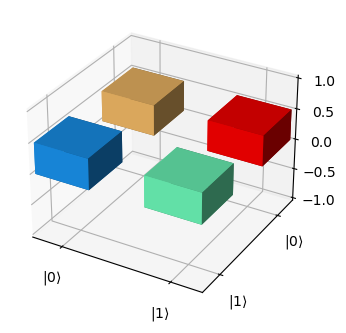

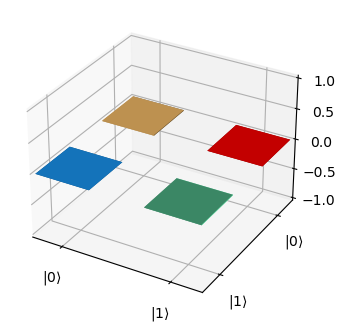

(None, None)

In [27]:
plot_rho1qb(rho.real), plot_rho1qb(rho.imag)

## Rodando o circuit no chip 


In [30]:
# carrega minha conta no IBMQ (o ID foi incluido no outro arquivo, nao precisa incluir aqui)
qiskit.IBMQ.load_account();

ibmqfactory.load_account:WARNING:2023-01-09 17:19:54,650: Credentials are already in use. The existing account in the session will be replaced.


In [31]:
#provider = IBMQ.get_provider('ibm-q')
provider = IBMQ.get_provider(hub = 'ibm-q-research-2', group = 'federal-uni-sant-1', project = 'main')

In [32]:
# determina em qual backend vamos executar o circuito
device = provider.get_backend('ibmq_quito')

In [33]:
# para monitorar a execucao
from qiskit.tools.monitor import job_monitor

In [34]:
# executa os circuitos para TEQ no chip
job = qiskit.execute(qstc, backend = device, shots = nshots)

In [35]:
print(job.job_id()); job_monitor(job)

63bc77b3413536528c3f7e7b
Job Status: job has successfully run


In [98]:
# 'ajusta' os resultados conforme o esperado do circuit qst
qstf = StateTomographyFitter(job.result(), qstc)

In [99]:
# extrai o operador densidade tomografado
rho = qstf.fit(method='lstsq'); rho

array([[0.53063965+0.j        , 0.48376465-0.04748535j],
       [0.48376465+0.04748535j, 0.46936035+0.j        ]])

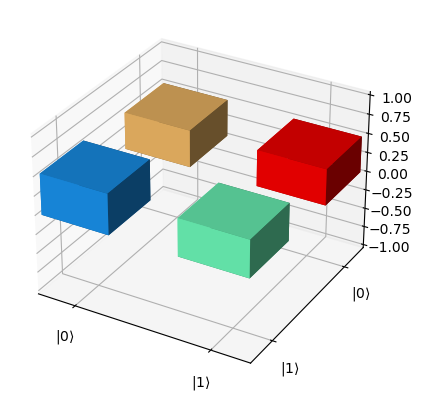

In [100]:
plot_rho1qb(rho.real), plot_rho1qb(rho.imag)

## Salvando o job em um arquivo

x,y=...# x e y recebem algum valor ou estrutura de algum lugar
with open('Filename_para_salvar.pkl', 'wb') as f:
    pickle.dump([x,y], f)
    
with open('Filename_para_salvar.pkl', 'rb') as f:
    x,y = pickle.logad(f)